<a href="https://colab.research.google.com/github/CodeHunterOfficial/TimeSeriesForecast_2024-2025/blob/main/%D0%A2%D0%B5%D0%BC%D0%B0%202.%20%D0%90%D0%BD%D0%B0%D0%BB%D0%B8%D1%82%D0%B8%D0%BA%D0%B0%20%D0%B2%D1%80%D0%B5%D0%BC%D0%B5%D0%BD%D0%BD%D1%8B%D1%85%20%D1%80%D1%8F%D0%B4%D0%BE%D0%B2/%D0%A2%D0%B5%D0%BC%D0%B0_2_%D0%90%D0%BD%D0%B0%D0%BB%D0%B8%D1%82%D0%B8%D0%BA%D0%B0_%D0%B2%D1%80%D0%B5%D0%BC%D0%B5%D0%BD%D0%BD%D1%8B%D1%85_%D1%80%D1%8F%D0%B4%D0%BE%D0%B2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Тема 2. Аналитика временных рядов

**Автокорреляционная функция**

Временной ряд представляет собой последовательность зависимых между собой наблюдений. Например, температура воздуха сегодня часто зависит от вчерашней температуры. Чтобы описать эту зависимость количественно, используют различные коэффициенты корреляции, такие как корреляция Пирсона, Спирмена и Кендалла. В контексте временных рядов мы интересуемся автокорреляцией, то есть корреляцией между разными наблюдениями одного и того же ряда в разные моменты времени, предполагая, что зависимость не меняется со временем.

Для оценки корреляции между значениями $ y_t $ и $ y_{t+\tau} $ при любом моменте времени $ t $, мы используем коэффициент корреляции Пирсона ряда с самим собой, сдвинутым на лаг $ \tau $. Это вычисляется следующим образом:

$$ r_\tau = \frac{\sum_{t=1}^{T-\tau} (y_t - \bar{y})(y_{t+\tau} - \bar{y})}{\sum_{t=1}^{T} (y_t - \bar{y})^2}, $$

где $ \tau $ — лаг автокорреляции, $ \bar{y} = \frac{1}{T} \sum_{t=1}^{T} y_t $ — среднее значение ряда, $ T $ — количество наблюдений.

Свойства коэффициента корреляции $ r_\tau $:
- $ |r_\tau| \leq 1 $;
- $ r_\tau = 0 $ означает отсутствие автокорреляции (при этом значения могут быть зависимыми);
- $ r_\tau > 0 $ — положительная корреляция, что указывает на тенденцию к увеличению значений;
- $ r_\tau < 0 $ — отрицательная корреляция, что указывает на тенденцию к уменьшению значений;
- $ |r_\tau| = 1 $ означает строгую линейную зависимость.

Чтобы оценить значимость автокорреляции при заданном лаге $ \tau $, применяют статистический критерий Льюнга-Бокса. Если p-value критерия меньше выбранного уровня значимости (например, 0.05), то автокорреляция с лагом $ \tau $ считается значимой.

#### Примеры
1.	**Дорожно-транспортные происшествия:**


Рассмотрим временной ряд дорожно-транспортных происшествий за 14 лет с дискретностью в 1 месяц, что составляет 12 измерений в год. На графике наблюдается явная сезонность. На нижнем графике представлена коррелограмма — графическое представление автокорреляционной функции. Точки на графике отображают значения автокорреляции. Значение автокорреляции при лаге 0 всегда равно 1, так как это корреляция ряда с самим собой. Также отмечается, что значение $ r_{12} $ является локальным максимумом, что указывает на высокую положительную корреляцию между значениями ряда за текущий месяц и за аналогичный месяц год назад. Это подтверждает наличие годичной сезонности в данных. В отличие от этого, значение $ r_{6} $ минимально в своей окрестности, что указывает на высокую отрицательную корреляцию между значениями ряда на полгода назад.

Закрашенная область на графике визуализирует границу незначимой автокорреляции, т.е. тех значений автокорреляции, для которых статистически не подтверждено значимое отличие от нуля (доверительный интервал пересекает 0). Из анализа видно, что последняя значимая сезонная автокорреляция — $ r_{24} $. Кроме того, значимы также сезонная корреляция $ r_{12} $ и корреляция за полгода $ r_{6} $. Среди несезонных автокорреляций значимы $ r_{1} $ и $ r_{2} $. Это позволяет сделать вывод, что для построения прогноза значения $ y_t $ имеет смысл учитывать признаки $ y_{t-1}, y_{t-2}, y_{t-6}, y_{t-12}, y_{t-24} $.


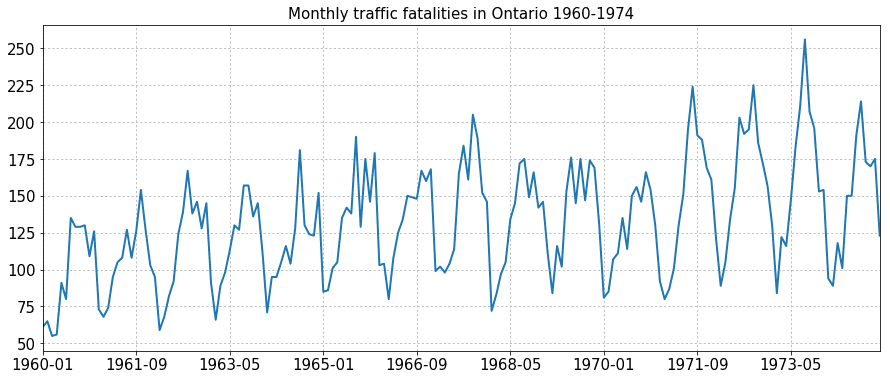

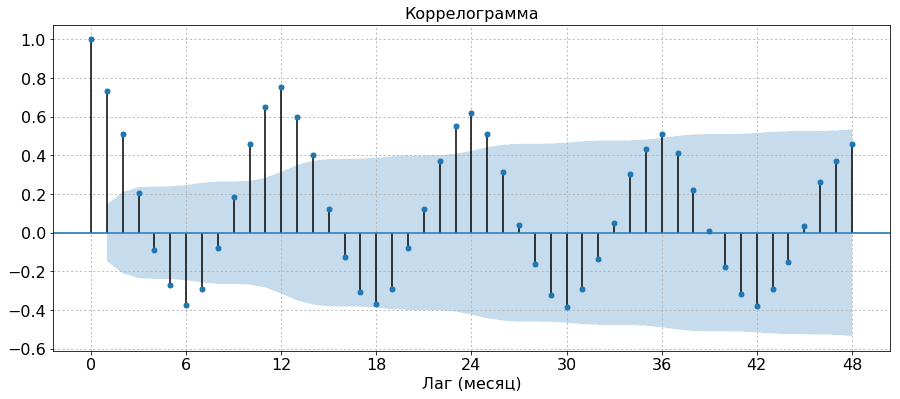

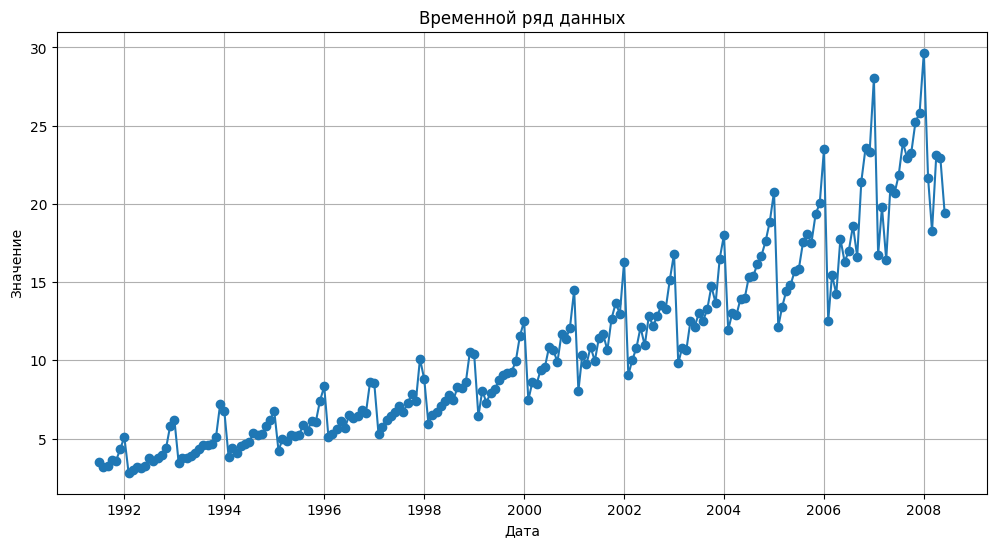

<Figure size 1200x600 with 0 Axes>

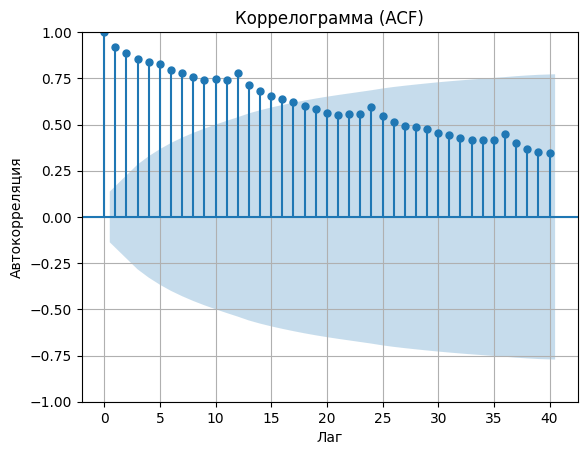

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Загрузка датасета
df = pd.read_csv('/content/AusAntidiabeticDrug.csv')

# Преобразование столбца с датами в формат datetime
df['ds'] = pd.to_datetime(df['ds'])

# Установка столбца ds в качестве индекса
df.set_index('ds', inplace=True)

# Визуализация временного ряда
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['y'], marker='o', linestyle='-')
plt.title('Временной ряд данных')
plt.xlabel('Дата')
plt.ylabel('Значение')
plt.grid(True)
plt.show()

# Построение автокорреляционной функции (ACF)
plt.figure(figsize=(12, 6))
sm.graphics.tsa.plot_acf(df['y'], lags=40)
plt.title('Коррелограмма (ACF)')
plt.xlabel('Лаг')
plt.ylabel('Автокорреляция')
plt.grid(True)
plt.show()


2.	**Потребление электричества в Австралии:** Рассмотрим временной ряд потребления электричества с дискретностью 30 минут. На графике автокорреляций мы видим, что значительная корреляция наблюдается между значениями соседних измерений (лаг 1), а также между значениями, отстоящими на сутки (лаг 48 половин часа). Однако значения, соответствующие лагам 12 (6 часов) и 36 (18 часов), имеют отрицательную корреляцию, что может свидетельствовать о снижении потребления электричества в определённые часы дня или ночи.

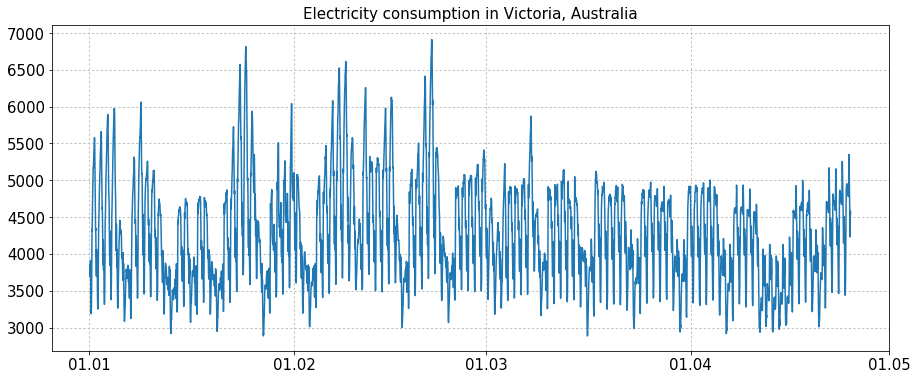

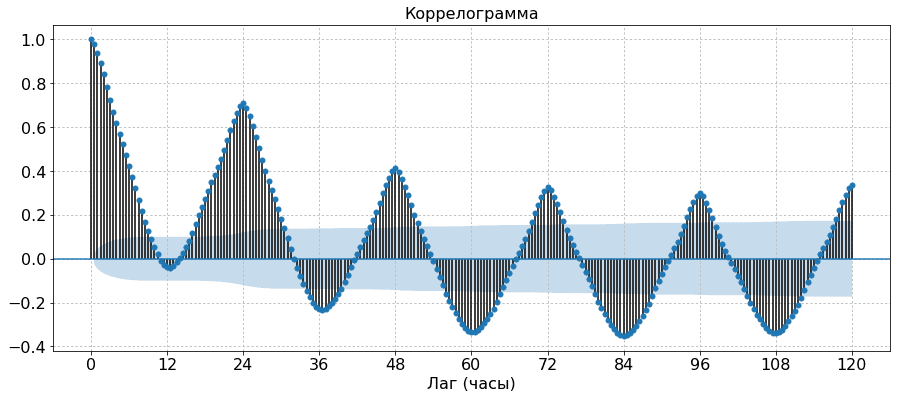

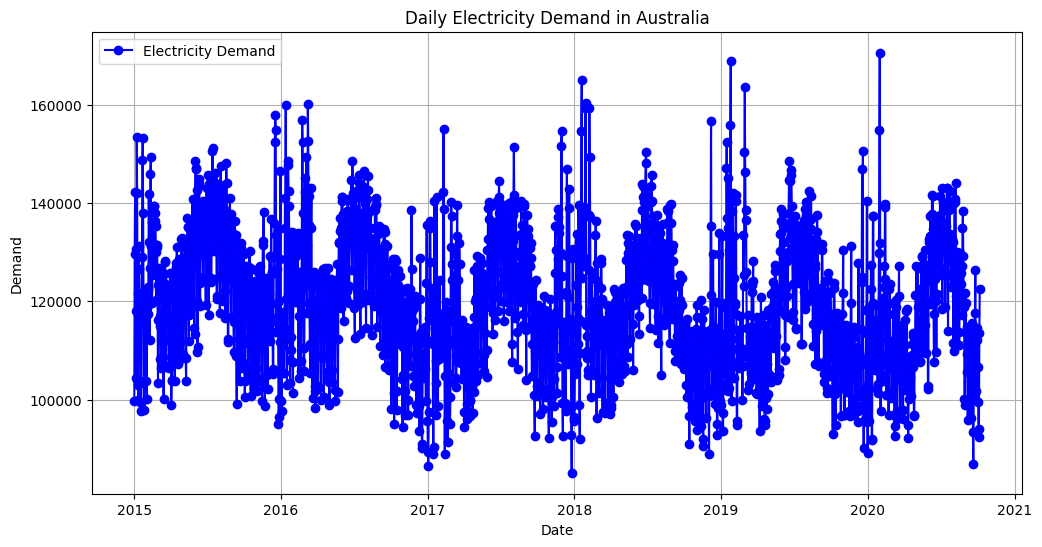

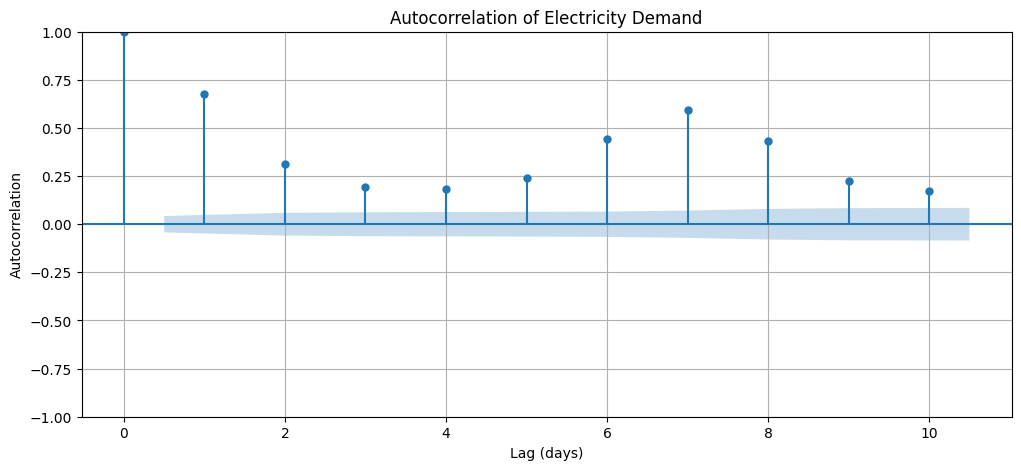

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Загрузка датасета
data = pd.read_csv('/content/complete_dataset.csv')


# Преобразуем столбец 'date' в формат datetime и установим его в качестве индекса
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)

# 1. Построение графика временного ряда потребления электричества
plt.figure(figsize=(12, 6))
plt.plot(data['demand'], marker='o', linestyle='-', color='b', label='Electricity Demand')
plt.title('Daily Electricity Demand in Australia')
plt.xlabel('Date')
plt.ylabel('Demand')
plt.grid(True)
plt.legend()
plt.show()

# 2. Проверка автокорреляции временного ряда
fig, ax = plt.subplots(figsize=(12, 5))
sm.graphics.tsa.plot_acf(data['demand'], lags=10, ax=ax)  # Показываем только первые 10 лагов
plt.title('Autocorrelation of Electricity Demand')
plt.xlabel('Lag (days)')
plt.ylabel('Autocorrelation')
plt.grid(True)
plt.show()





Таким образом, для построения прогноза значений $ y_t $ рассматриваются значимые лаги автокорреляции, такие как $ y_{t-1}, y_{t-2}, y_{t-6}, y_{t-12}, y_{t-24} $.

Напомним, что лаг в контексте временных рядов представляет собой количество временных единиц (например, периодов, шагов времени и т.д.), на которое происходит сдвиг между текущим и сравниваемым наблюдением.


Понимание автокорреляционной функции важно для анализа временных рядов и прогнозирования их поведения в будущем.

Давай рассмотрим конкретный числовой пример автокорреляционной функции на основе искусственного временного ряда.

Предположим, у нас есть временной ряд с температурой за 12 месяцев (год), где значения температуры представлены следующим образом:

$$ y = [20, 22, 25, 28, 30, 32, 35, 34, 31, 28, 25, 22] $$

1. **Вычисление среднего значения:**

$$ \bar{y} = \frac{1}{12} \sum_{t=1}^{12} y_t = \frac{20 + 22 + 25 + 28 + 30 + 32 + 35 + 34 + 31 + 28 + 25 + 22}{12} = 28.33 $$

2. **Вычисление автокорреляционной функции для разных лагов:**

Давайтете вычислим коэффициенты автокорреляции $ r_\tau $ для различных лагов $ \tau $.

- Для $ \tau = 0 $:

$$ r_0 = \frac{\sum_{t=1}^{12} (y_t - \bar{y})^2}{\sum_{t=1}^{12} (y_t - \bar{y})^2} = 1 $$

- Для $ \tau = 1 $:

$$ r_1 = \frac{\sum_{t=1}^{11} (y_t - \bar{y})(y_{t+1} - \bar{y})}{\sum_{t=1}^{12} (y_t - \bar{y})^2} $$

Вычисляем числитель:

$$ (y_1 - \bar{y})(y_2 - \bar{y}) + (y_2 - \bar{y})(y_3 - \bar{y}) + \ldots + (y_{11} - \bar{y})(y_{12} - \bar{y}) = 120.19 $$

Вычисляем знаменатель:

$$ \sum_{t=1}^{12} (y_t - \bar{y})^2 = 154.67 $$

Таким образом,

$$ r_1 = \frac{120.19}{154.67} = 0.776 $$

- Для $ \tau = 2 $:

$$ r_2 = \frac{\sum_{t=1}^{10} (y_t - \bar{y})(y_{t+2} - \bar{y})}{\sum_{t=1}^{12} (y_t - \bar{y})^2} $$

Вычисляем числитель:

$$ (y_1 - \bar{y})(y_3 - \bar{y}) + (y_2 - \bar{y})(y_4 - \bar{y}) + \ldots + (y_{10} - \bar{y})(y_{12} - \bar{y}) = 98.08 $$

Вычисляем знаменатель:

$$ \sum_{t=1}^{12} (y_t - \bar{y})^2 = 154.67 $$

Таким образом,

$$ r_2 = \frac{98.08}{154.67} = 0.634 $$

Таким образом, мы вычислили значения автокорреляционной функции $ r_\tau $ для лагов $ \tau = 0, 1, 2 $ для временного ряда с температурой. Эти значения показывают, насколько сильно текущие значения коррелируют с значениями, сдвинутыми на соответствующее количество месяцев вперёд.

Чтобы проиллюстрировать вычисление автокорреляционной функции на Python, давайте напишем код для вычисления коэффициентов автокорреляции Пирсона для заданного временного ряда с помощью библиотеки NumPy.



Помимо коэффициента корреляции Пирсона, для оценки автокорреляции временных рядов также часто используются:

1. **Коэффициент корреляции Спирмена:** Этот коэффициент оценивает степень монотонной зависимости между двумя переменными, не обязательно линейной. Он выражает схожесть порядка рангов наблюдений для двух выборок. Корреляция Спирмена чувствительна к отличиям в рангах значений, а не к их абсолютным значениям.
Формула коэффициента корреляции Спирмена для выборок $ (X, Y) $ длины $ n $:

$$ r_{\tau}^{Spearman} = \frac{\text{cov}(rg(X), rg(Y))}{\sqrt{\text{var}(rg(X)) \text{var}(rg(Y))}}, $$

где:
- $ rg(X) $ и $ rg(Y) $ — ранги значений выборок $ X $ и $ Y $,
- $ \text{cov} $ — ковариация,
- $ \text{var} $ — дисперсия.
### Ковариация

Ковариация двух выборок $ X $ и $ Y $ длины $ n $ вычисляется по следующей формуле:

$$ \text{cov}(X, Y) = \frac{1}{n} \sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y}), $$

где:
- $ x_i $ и $ y_i $ — значения в выборках $ X $ и $ Y $ на позиции $ i $,
- $ \bar{x} $ и $ \bar{y} $ — средние значения выборок $ X $ и $ Y $,
- $ n $ — количество наблюдений в выборках.

### Дисперсия

Дисперсия выборки $ X $ длины $ n $ вычисляется по формуле:

$$ \text{var}(X) = \frac{1}{n} \sum_{i=1}^{n} (x_i - \bar{x})^2, $$

где:
- $ x_i $ — значения в выборке $ X $ на позиции $ i $,
- $ \bar{x} $ — среднее значение выборки $ X $,
- $ n $ — количество наблюдений в выборке.

### Ранги

Для заданной выборки $ X $ длины $ n $:

1. **Ранг $ rg(X) $** для значения $ x_i $ — это позиция $ i $-го элемента в отсортированном массиве значений выборки $ X $.

Например, если исходная выборка $ X $ имеет значения $ X = [10, 5, 15, 7] $, то после сортировки получим $ X_{sorted} = [5, 7, 10, 15] $. Тогда ранги будут:

- $ rg(X)[1] = 2 $ для $ x_1 = 5 $,
- $ rg(X)[2] = 3 $ для $ x_2 = 7 $,
- $ rg(X)[3] = 1 $ для $ x_3 = 10 $,
- $ rg(X)[4] = 4 $ для $ x_4 = 15 $.

2. Аналогично вычисляются ранги $ rg(Y) $ для выборки $ Y $.


2. **Коэффициент корреляции Кендалла:** Этот коэффициент также оценивает степень монотонной зависимости между двумя переменными, основываясь на совпадении порядка рангов. Он более устойчив к выбросам, чем коэффициент Пирсона, и хорошо подходит для оценки корреляции в случае, когда данные не являются нормально распределёнными или когда есть выбросы.

Формула коэффициента корреляции Кендалла для выборок $ (X, Y) $ длины $ n $:

$$ \tau_{\tau} = \frac{n_c - n_d}{\frac{n(n-1)}{2}}, $$

где:
- $ n_c $ — количество пар с согласованными рангами (concordant pairs),
- $ n_d $ — количество пар с несогласованными рангами (discordant pairs),
- $ n $ — количество наблюдений в ряду.


Коэффициенты корреляции Спирмена и Кендалла также могут быть применены для вычисления автокорреляционной функции временных рядов, аналогично тому, как используется коэффициент Пирсона. Однако на практике коэффициент Пирсона чаще всего используется из-за своей простоты вычисления и интерпретации, особенно если ряды имеют приближенно нормальное распределение и линейные зависимости.

Таким образом, когда говорят о вычислении автокорреляции с помощью коэффициента корреляции, часто имеют в виду коэффициент Пирсона, но в некоторых случаях можно использовать и другие коэффициенты в зависимости от природы данных и поставленных задач.



